##Hierarchical Clustering:
###Unlike K-Means clustering, hierarchical clustering does not start with an initial approach of selecting means or medioids. Instead, it starts by computing the distance matrix i.e. a matrix consisting of the distances between the objects. Based on the type of approach we may either start to group objects close to each other or split objects/clusters having greatest distance from each other. The decision on split/merge is thus based on the distance measure.
###K Means clustering is not suitable for non-hypergeometric clusters i.e. clusters having spherical shape like circular, spherical etc. This is where hierarchical clustering helps, since it works on non-hypergeometric clusters as well. Morover K Means clustering works on numeric data, but hierarchcial clustering can work on any type of data like nominal, ordinal etc. 
###Also, hierarchical clustering produces reproducible output

In [ ]:
#Let us consider an example for hierarchical clustering.
import pandas as pd
v1=[2,5.5,5,1.5,1,7,5.75]
v2=[2,4,5,2.5,1,5,6.5]
df=pd.DataFrame({"Variable1":v1,"Variable2":v2})
df

,Variable1,Variable2
0,2.00,2.0
1,5.50,4.0
2,5.00,5.0
3,1.50,2.5
4,1.00,1.0
5,7.00,5.0
6,5.75,6.5


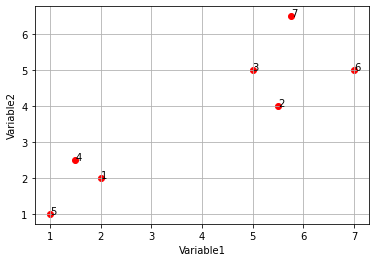

In [ ]:
import matplotlib.pyplot as plt
x=df['Variable1']
y=df['Variable2']
l=range(1,8)
fig,ax=plt.subplots()
ax.scatter(x,y,marker='o',c='red')
for i,txt in enumerate(l):
  ax.annotate(txt,(x[i],y[i]))
plt.xlabel("Variable1")
plt.ylabel("Variable2")
plt.grid()
plt.show()

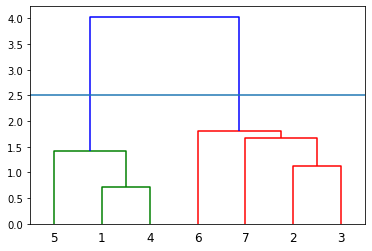

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df,'single')
dendrogram(linked,orientation='top',labels=l)
plt.axhline(y=2.5)
plt.show()

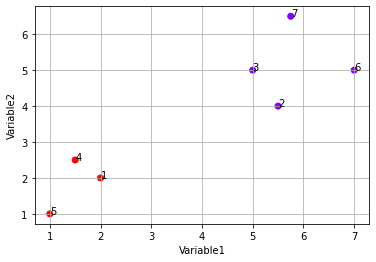

In [ ]:
import sklearn
from sklearn.cluster import AgglomerativeClustering
hcluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
hcluster.fit(df)
hcluster.fit_predict(df)
hlabels=hcluster.labels_
fig,ax=plt.subplots()
ax.scatter(x,y,marker='o',c=hlabels,cmap='rainbow')
for i,txt in enumerate(l):
  ax.annotate(txt,(x[i],y[i]))
plt.xlabel("Variable1")
plt.ylabel("Variable2")
plt.grid()
plt.show()